<b>About Dataset</b> <br>

<b>Content</b> <br>
The dataset contains 2 folders:

<li>Infected</li>
<li>Uninfected</li>
And a total of 27,558 images.<br>

<b>Acknowledgements</b> <br>
This Dataset is taken from the official NIH Website: https://ceb.nlm.nih.gov/repositories/malaria-datasets/
And uploaded here, so anybody trying to start working with this dataset can get started immediately, as to download the
dataset from NIH website is quite slow.<br>
Photo by Егор Камелев on Unsplash<br>
https://unsplash.com/@ekamelev 

<b>Inspiration</b> <br>
Save humans by detecting and deploying Image Cells that contain Malaria or not!


https://www.kaggle.com/datasets/iarunava/cell-images-for-detecting-malaria

## Bibliotheken importieren

In [58]:
import pandas as pd
import numpy as np

import cv2
import os
from tqdm import tqdm

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact, interactive

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

from sklearn.svm import SVC
from sklearn.svm import LinearSVC

from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix

## Data einlesen

In [3]:
path = 'cell_images'

sub_directories = os.listdir(path)
sub_directories.sort(reverse = True)

print(sub_directories)

['Uninfected', 'Parasitized']


In [4]:
# Speichern der Bilddateinamen in die Variable X und die Zielvariable in die Variable y

X = []
y = []

for ind, sub_dir in enumerate(sub_directories):
    sub_path = path + '/' + sub_dir + '/'
       
    tmp = [sub_path + item for item in os.listdir(sub_path)]
    
    print('in', sub_dir, ':', len(tmp), 'images')
       
    X.extend(tmp)

    y.extend([ind] * len(tmp))

d = {'path': X}
X = pd.DataFrame(data = d)
X

in Uninfected : 13779 images
in Parasitized : 13779 images


,path
0,cell_images/Uninfected/C100P61ThinF_IMG_201509...
1,cell_images/Uninfected/C100P61ThinF_IMG_201509...
2,cell_images/Uninfected/C100P61ThinF_IMG_201509...
3,cell_images/Uninfected/C100P61ThinF_IMG_201509...
4,cell_images/Uninfected/C100P61ThinF_IMG_201509...
...,...
27553,cell_images/Parasitized/C99P60ThinF_IMG_201509...
27554,cell_images/Parasitized/C99P60ThinF_IMG_201509...
27555,cell_images/Parasitized/C99P60ThinF_IMG_201509...
27556,cell_images/Parasitized/C99P60ThinF_IMG_201509...


    --> Die Gruppe 'Uninfected' und 'Parasitized' sind gleich groß

In [5]:
print(len(X))
print(len(y))
print(X.shape)

27558
27558
(27558, 1)


## Train / Test Split

In [6]:
# in Train und Test aufteilen
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

In [7]:
X_train.shape

(19290, 1)

In [8]:
unique, counts = np.unique(y_train, return_counts=True)
print(np.asarray((unique, counts)).T)

[[   0 9640]
 [   1 9650]]


## Data Visualisierung

### Bildgrößen

In [9]:
def read_img(filepath):
    img = cv2.imread(filepath)
    return img

def get_image_size(filepath):
    img = read_img(filepath)
    
    return img.shape

In [10]:
sizes = X_train.iloc[:, 0].apply(lambda x: get_image_size(x))

sizes_df = pd.DataFrame(list(sizes), columns =['Height', 'Width', 'Channel'])
sizes_df

,Height,Width,Channel
0,151,124,3
1,145,127,3
2,142,142,3
3,130,136,3
4,130,115,3
...,...,...,...
19285,127,136,3
19286,157,172,3
19287,121,121,3
19288,139,109,3


In [11]:
sizes_df.describe()

,Height,Width,Channel
count,19290.000000,19290.000000,19290.0
mean,132.875428,132.390669,3.0
std,20.461460,20.118690,0.0
min,40.000000,49.000000,3.0
25%,121.000000,121.000000,3.0
50%,130.000000,130.000000,3.0
75%,145.000000,142.000000,3.0
max,382.000000,394.000000,3.0


    --> die Bilder sind unterschiedlich groß 

### Visualisierung von Bildern

In [12]:
def plot_images_chanel(X, y, chanels, title = ''):
    def upd(x):
        ind = chanels.index(x)
        plot_images(X, y, chanel = ind, title=title + x)
        
    interact(upd, x=chanels)
    
def plot_images(X, y,chanel = -1, x_s = 4, y_s = 10, cmap = 'viridis', title = ''):
    fig, axes = plt.subplots(x_s, y_s, figsize=(y_s*2, x_s*2))
    
    for i, ax in enumerate(axes.flatten()):
        
        if (chanel >= 0) & (chanel <= 2):
            ax.imshow(X[i][:,:,chanel], interpolation="none", cmap='gray')
        else:
            ax.imshow(X[i], interpolation="none", cmap=cmap)

        ax.set_title(y[i])
        ax.axis("off")
    fig.suptitle(title, fontsize=16)

In [13]:
X_train_vis = list(X_train.iloc[:40, 0].apply(read_img))
y_train_vis = y_train[:40]

print(len(y_train_vis))

40


#### RGB

In [14]:
plot_images_chanel(X_train_vis, y_train_vis, title = 'GBR: ', chanels = ['Red', 'Green', 'Blue', 'GBR']) 

interactive(children=(Dropdown(description='x', options=('Red', 'Green', 'Blue', 'GBR'), value='Red'), Output(…

#### Grayscale

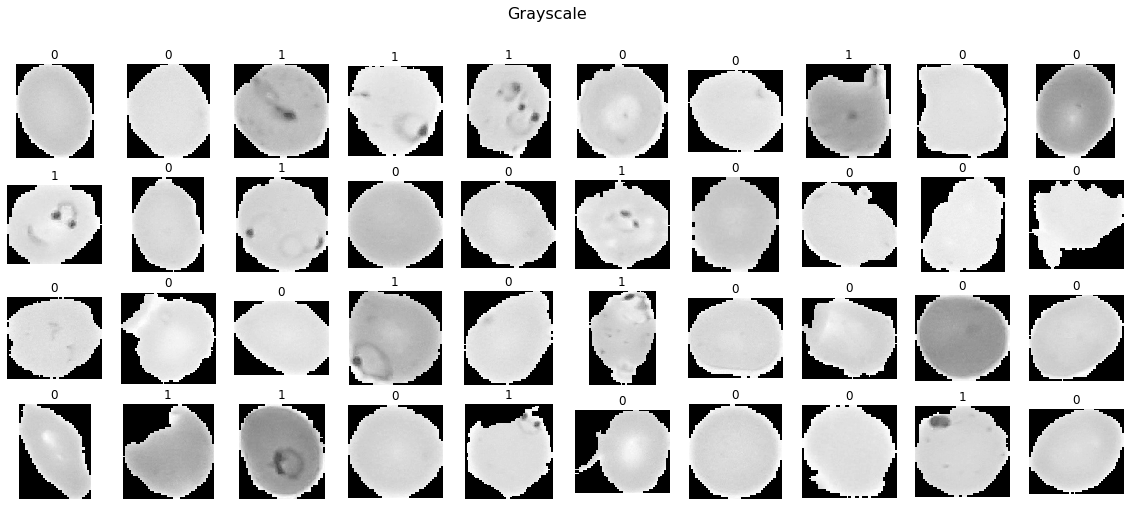

In [15]:
X_train_gray = []
for img in X_train_vis:
    X_train_gray.append(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY))
    
plot_images(X_train_gray, y_train_vis, title = 'Grayscale', cmap='gray')

#### HSV

In [16]:
X_train_hsv = []
for i, img in enumerate(X_train_vis):
    X_train_hsv.append(cv2.cvtColor(img, cv2.COLOR_BGR2HSV))

plot_images_chanel(X_train_hsv, y_train_vis, title = 'HSV: ', chanels = ['Hue', 'Saturation', 'Value', 'HSV']) 

interactive(children=(Dropdown(description='x', options=('Hue', 'Saturation', 'Value', 'HSV'), value='Hue'), O…

#### HSL

In [17]:
X_train_hsl = []
for img in X_train_vis:
    X_train_hsl.append(cv2.cvtColor(img, cv2.COLOR_BGR2HLS))
    
plot_images_chanel(X_train_hsl, y_train_vis, title = 'HSL: ', chanels = ['Hue', 'Saturation', 'Lightness', 'HSL']) 

interactive(children=(Dropdown(description='x', options=('Hue', 'Saturation', 'Lightness', 'HSL'), value='Hue'…

#### Sharpen

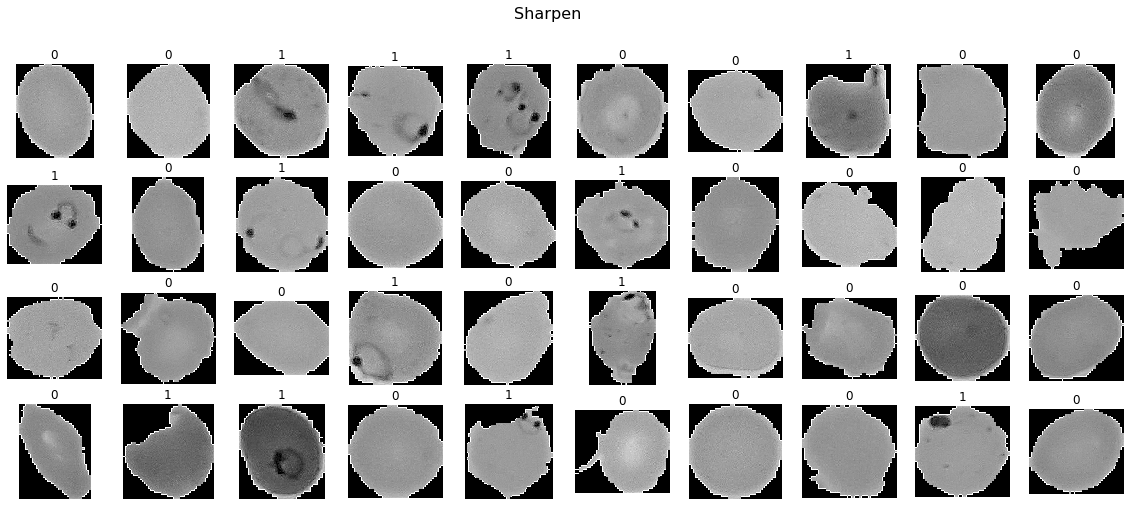

In [18]:
kernel = np.array([[0,-1,0], [-1,5,-1], [0,-1,0]])

X_train_sharp = []

for i, img in enumerate(X_train_vis):
    X_train_sharp.append(cv2.filter2D(img[:,:, 1], -1, kernel))

plot_images(X_train_sharp, y_train_vis, title = 'Sharpen', cmap='gray')

## Image Features

### Hu Moments 

https://www.learnopencv.com/shape-matching-using-hu-moments-c-python/

In [19]:
type(X_train_sharp)

list

In [20]:
feature = cv2.HuMoments(cv2.moments(X_train_sharp[0])).flatten()
feature

array([ 1.04294018e-03,  7.37907530e-08,  3.98117877e-13,  6.54380792e-15,
        2.94268554e-28,  1.55419495e-18, -1.58002164e-28])

### Histograms

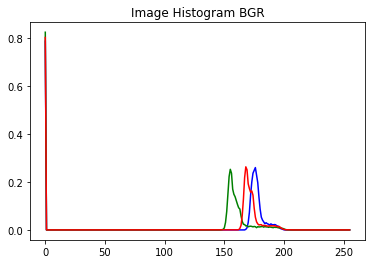

In [21]:
# define colors to plot the histograms
colors = ('b','g','r')
  
# compute and plot the image histograms
for i,color in enumerate(colors):
    hist = cv2.calcHist([X_train_vis[0]],[i],None,[256],[0,256])
    cv2.normalize(hist, hist);
    plt.plot(hist,color = color)
plt.title('Image Histogram BGR')
plt.show()

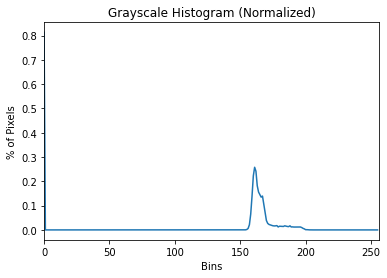

In [22]:
hist = cv2.calcHist([X_train_gray[0]],None,None,[256],[0,256])
cv2.normalize(hist, hist);

plt.figure()
plt.title("Grayscale Histogram (Normalized)")
plt.xlabel("Bins")
plt.ylabel("% of Pixels")
plt.plot(hist)
plt.xlim([0, 256])
plt.show()

### Gradient

In [23]:
sobel_train_x = cv2.Sobel(X_train_gray[2], cv2.CV_64F, dx=1, dy=0, ksize=1)
sobel_train_y = cv2.Sobel(X_train_gray[2], cv2.CV_64F, dx=0, dy=1, ksize=1)

In [24]:
train_g, train_theta = cv2.cartToPolar(sobel_train_x, sobel_train_y)                                      

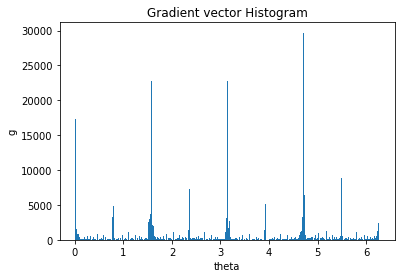

In [25]:
plt.figure()
plt.title("Gradient vector Histogram")
plt.xlabel("theta")
plt.ylabel("g")
plt.hist(train_theta.flatten(), bins=360, weights=train_g.flatten())
plt.show()

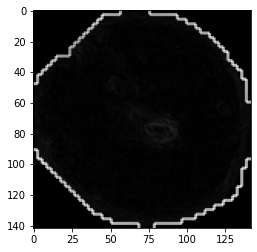

In [26]:
plt.figure()
plt.imshow(train_g, cmap='gray')
plt.show()

## Erstellung des Trainingsdatensatzes

In [27]:
def get_hu_moments(img):
    return cv2.HuMoments(cv2.moments(img)).flatten()

def get_rgb_hist(img):
    hists = []
    for i in range(0, img.shape[2]):

        hist = cv2.calcHist([img],[i],None,[256],[0,256]).flatten()
        hists.extend(hist)
    
    return hists

def get_grayscale_hist(img):
    return cv2.calcHist([img], None, None, [256], [0,256]).flatten()

def get_gradient_hist(img):
    sobel_x = cv2.Sobel(img, cv2.CV_64F, dx=1, dy=0, ksize=1)
    sobel_y = cv2.Sobel(img, cv2.CV_64F, dx=0, dy=1, ksize=1)
        
    g, theta = cv2.cartToPolar(sobel_x, sobel_y)  
    hist, borders = np.histogram(theta, bins=360, range = (0., 2.*np.pi), weights=g)

    return list(hist)
    

In [28]:
def get_img_features(bgr_img):
   
    img_gray = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2GRAY)
    
    return np.hstack([get_hu_moments(img_gray), get_gradient_hist(img_gray), get_grayscale_hist(img_gray)]) # get_rgb_hist(img),

def get_features(filepath):
    # !!! fill global variable 'features'
    img = read_img(filepath)
        
    features.append(get_img_features(img))

In [29]:
# für jedes Bild seine Eigenschaften erhalten
features = []

X_train.loc[:, 'path'].apply(get_features);

In [30]:
X_train_features = pd.DataFrame(features)
print(X_train_features.shape)

(19290, 623)


In [31]:
# numerische features skalieren
scaler = StandardScaler()
scaler.fit(X_train_features)
X_train_features = scaler.transform(X_train_features)

In [32]:
X_train_features.shape

(19290, 623)

## Tets Data Vorbereitung

In [33]:
features = []

X_test.loc[:, 'path'].apply(get_features)
X_test_features = pd.DataFrame(features)
print(X_test_features.shape)

X_test_features = scaler.transform(X_test_features)

(8268, 623)


## Modelle

### SVM Model

In [46]:
svc_mod = SVC(verbose=True)
svc_mod.fit(X_train_features, y_train)

print('Acc Train =', round(svc_mod.score(X_train_features, y_train) * 100, 2))
print('Acc Test =', round(svc_mod.score(X_test_features, y_test) * 100, 2))

[LibSVM]Acc Train = 96.33
Acc Test = 94.68


In [47]:
svc_mod.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': True}

### LGBMClassifier

In [85]:
param_grid = {
    "learning_rate": [0.01, 0.05, 0.1, 0.2, 0.5],
    "n_estimators": [50, 100, 150, 200, 250],
    'max_depth' : [3, 5, 7, 8]
}


LGBMClassifier_gridsearch_hp_tuning = GridSearchCV(
        LGBMClassifier(),
        param_grid=param_grid,
        n_jobs=-1,
        verbose = 2
)

LGBMClassifier_gridsearch_hp_tuning.fit(X_train_features, y_train)

print(LGBMClassifier_gridsearch_hp_tuning.best_params_)
print("best_score = ", LGBMClassifier_gridsearch_hp_tuning.best_score_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
{'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 250}
best_score =  0.9581130119232762


In [36]:
lgbmc_mod= LGBMClassifier(learning_rate = 0.1, max_depth = 5, n_estimators = 250)
lgbmc_mod.fit(X_train_features, y_train)

print('Acc Train =', round(lgbmc_mod.score(X_train_features, y_train) * 100, 2))
print('Acc Test =', round(lgbmc_mod.score(X_test_features, y_test) * 100, 2))

Acc Train = 100.0
Acc Test = 96.14


### GradientBoostingClassifier

In [ ]:
# param_grid = {
#     "learning_rate": [0.01, 0.05, 0.1, 0.2, 0.5],
#     "n_estimators": [50, 100, 150, 200, 250],
#     'max_depth' : [3, 5, 8],
#     'min_samples_leaf' : [1, 3, 5, 8]
# }


# gradientBoostingClassifier_gridsearch_hp_tuning = GridSearchCV(
#         GradientBoostingClassifier(),
#         param_grid=param_grid,
#       #  scoring="accuracy",
#         n_jobs=-1,
#         verbose = 2
# )

# gradientBoostingClassifier_gridsearch_hp_tuning.fit(X_train_features, y_train)
# print(gradientBoostingClassifier_gridsearch_hp_tuning.best_params_)

# print("best_score = ", gradientBoostingClassifier_gridsearch_hp_tuning.best_score_)

Fitting 5 folds for each of 300 candidates, totalling 1500 fits


In [37]:
gb_mod = GradientBoostingClassifier() 

gb_mod.fit(X_train_features, y_train)

print('Acc Train =', round(gb_mod.score(X_train_features, y_train) * 100, 2))
print('Acc Test =', round(gb_mod.score(X_test_features, y_test) * 100, 2))

Acc Train = 96.19
Acc Test = 95.68


### XGBClassifier

In [40]:
xgb_mod = XGBClassifier(n_estimators=250, learning_rate=0.1, max_depth=5) 
xgb_mod.fit(X_train_features, y_train)

print('Acc Train =', round(xgb_mod.score(X_train_features, y_train) * 100, 2))
print('Acc Test =', round(xgb_mod.score(X_test_features, y_test) * 100, 2))

Acc Train = 99.85
Acc Test = 96.24


### Modell-Ensemble

In [51]:
# Die besten 3 Modelle nehmen
y_test_pred_lgbmc_mod= lgbmc_mod.predict(X_test_features)
y_test_pred_gb_mod = gb_mod.predict(X_test_features)
y_test_pred_xgb_mod = xgb_mod.predict(X_test_features)


data = {'LGBMC': y_test_pred_lgbmc_mod, 'GB': y_test_pred_gb_mod, 'XGB': y_test_pred_xgb_mod}

y_test_pred_df = pd.DataFrame(data)

In [52]:
y_test_pred_df.head(7)

,LGBMC,GB,XGB
0,1,1,1
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
5,1,1,1
6,0,0,0


In [54]:
y_test_pred = y_test_pred_df.mode(axis=1)
y_test_pred

,0
0,1
1,0
2,0
3,0
4,0
...,...
8263,1
8264,1
8265,0
8266,0


In [55]:
round(accuracy_score(y_test, y_test_pred) *100, 5)

96.21432

In [57]:
confusion_matrix(y_test, y_test_pred)

array([[4011,  128],
       [ 185, 3944]], dtype=int64)

In [59]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96      4139
           1       0.97      0.96      0.96      4129

    accuracy                           0.96      8268
   macro avg       0.96      0.96      0.96      8268
weighted avg       0.96      0.96      0.96      8268



### PCA

In [60]:
pca_model = PCA()
pca_model.fit(X_train_features)

PCA()

Text(0, 0.5, 'Explained Variance')

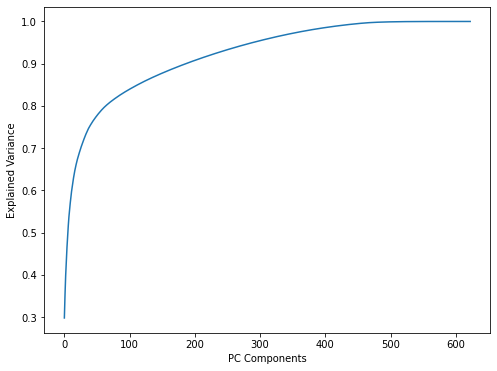

In [63]:
cum_sum = np.cumsum(pca_model.explained_variance_ratio_)


plt.figure(figsize=(8,6))
plt.plot(cum_sum)


plt.xlabel("PC Components")
plt.ylabel("Explained Variance")

In [70]:
boundary = 0.99

for i, var in enumerate(cum_sum):
    if var > boundary:
        break
        
n_components = i - 1
print(n_components)

421


In [71]:
# für Train Data Reduktion der Dimension
pca_model_90 = PCA(n_components=n_components)
pca_model_90.fit(X_train_features)

X_train_auto_reduced = pca_model_90.transform(X_train_features)
X_train_auto_reduced.shape


(19290, 421)

In [76]:
# für Test Data Reduktion der Dimension
X_test_auto_reduced = pca_model_90.transform(X_test_features)
X_test_auto_reduced.shape

(8268, 421)

In [77]:
xgb_mod = XGBClassifier(n_estimators=250, learning_rate=0.1, max_depth=5) 
xgb_mod.fit(X_train_auto_reduced, y_train)

print('Acc Train =', round(xgb_mod.score(X_train_auto_reduced, y_train) * 100, 2))
print('Acc Test =', round(xgb_mod.score(X_test_auto_reduced, y_test) * 100, 2))

Acc Train = 99.36
Acc Test = 93.31
